In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [35]:
#Loading original dataset
booking = pd.read_csv('diabetes.csv')
df = booking[["Glucose", "BloodPressure", "Insulin", "DiabetesPedigreeFunction","Age","Outcome"]]

In [36]:
df

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,0.627,50,1
1,85,66,0,0.351,31,0
2,183,64,0,0.672,32,1
3,89,66,94,0.167,21,0
4,137,40,168,2.288,33,1
...,...,...,...,...,...,...
763,101,76,180,0.171,63,0
764,122,70,0,0.340,27,0
765,121,72,112,0.245,30,0
766,126,60,0,0.349,47,1


In [37]:
#Loading generated dataset
df2 = pd.read_csv('diabetes2.csv')
df2

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,0.0,0.0,0.0,7.0,0.0,1
1,99.0,0.0,89.0,1.0,68.0,1
2,100.0,0.0,89.0,2.0,56.0,1
3,98.0,0.0,89.0,2.0,56.0,1
4,97.0,0.0,89.0,2.0,56.0,1
...,...,...,...,...,...,...
9995,1.0,99.0,74.0,0.0,73.0,0
9996,1.0,99.0,74.0,0.0,74.0,0
9997,1.0,99.0,74.0,0.0,75.0,0
9998,1.0,99.0,74.0,0.0,76.0,0


In [38]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df)
df2['is_inlier_IF'] = iso_forest.predict(df2)

In [39]:
inliers_IF = df2[df2['is_inlier_IF'] == 1]
outliers_IF = df2[df2['is_inlier_IF'] == -1]

In [40]:
outliers_IF

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,is_inlier_IF
0,0.0,0.0,0.0,7.0,0.0,1,-1
1,99.0,0.0,89.0,1.0,68.0,1,-1
2,100.0,0.0,89.0,2.0,56.0,1,-1
3,98.0,0.0,89.0,2.0,56.0,1,-1
4,97.0,0.0,89.0,2.0,56.0,1,-1
...,...,...,...,...,...,...,...
9995,1.0,99.0,74.0,0.0,73.0,0,-1
9996,1.0,99.0,74.0,0.0,74.0,0,-1
9997,1.0,99.0,74.0,0.0,75.0,0,-1
9998,1.0,99.0,74.0,0.0,76.0,0,-1


In [41]:
inliers_IF

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,is_inlier_IF


In [42]:
def is_inlier(row):
    # Glucose constraint: 0 < Glucose < 200
    if row['Glucose'] < 0 or row['Glucose'] > 200:
        return -1

    # Insulin constraint: 0 < Insulin < 900
    if row['Insulin'] < 0 or row['Insulin'] > 900:
        return -1

    #Blood pressure constraint: should be < 180 
    if row['BloodPressure'] > 180:
        return -1
        
    #DiabetesPedigreeFunction constraint: cant be > 2.5
    if row['DiabetesPedigreeFunction'] > 2.5:
        return -1
        
    #DiabetesPedigreeFunction constraint: If age >60, DiabetesPedigreeFunction < 2
    if row['Age'] > 60 and row['DiabetesPedigreeFunction'] > 2:
        return -1
        
    #Outcome constraint: should be either 1 or 0
    if row['Outcome'] not in [0, 1]:
        return -1

    # If all constraints are satisfied, return True
    return 1

In [43]:
#Extracting and analysing through human-written constraints
df2['is_inlier_HW'] = df2.apply(is_inlier, axis=1)

In [44]:
inliers_HW = df2[df2['is_inlier_HW'] == 1]
outliers_HW = df2[df2['is_inlier_HW'] == -1]
outliers_HW

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,is_inlier_IF,is_inlier_HW
0,0.0,0.0,0.0,7.0,0.0,1,-1,-1
23,78.0,0.0,89.0,3.0,29.0,1,-1,-1
24,77.0,0.0,89.0,3.0,29.0,1,-1,-1
25,76.0,0.0,89.0,3.0,29.0,1,-1,-1
26,75.0,0.0,89.0,3.0,29.0,1,-1,-1
...,...,...,...,...,...,...,...,...
9918,1.0,99.0,73.0,5.0,0.0,0,-1,-1
9919,1.0,99.0,74.0,6.0,0.0,0,-1,-1
9920,1.0,99.0,74.0,7.0,0.0,0,-1,-1
9921,1.0,99.0,74.0,4.0,0.0,0,-1,-1


In [45]:
inliers_HW

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,is_inlier_IF,is_inlier_HW
1,99.0,0.0,89.0,1.0,68.0,1,-1,1
2,100.0,0.0,89.0,2.0,56.0,1,-1,1
3,98.0,0.0,89.0,2.0,56.0,1,-1,1
4,97.0,0.0,89.0,2.0,56.0,1,-1,1
5,96.0,0.0,89.0,2.0,56.0,1,-1,1
...,...,...,...,...,...,...,...,...
9995,1.0,99.0,74.0,0.0,73.0,0,-1,1
9996,1.0,99.0,74.0,0.0,74.0,0,-1,1
9997,1.0,99.0,74.0,0.0,75.0,0,-1,1
9998,1.0,99.0,74.0,0.0,76.0,0,-1,1


In [46]:
#disagreements between two methods
df2['similar'] = abs(df2['is_inlier_IF'] + df2['is_inlier_HW']) / 2

In [47]:
mismatch = df2[df2['similar'] == 0]
similar = df2[df2['similar'] == 1]

In [48]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [49]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df2['is_inlier_HW'], df2['is_inlier_IF'])
conf_matrix

array([[5356,    0],
       [4644,    0]])

Text(95.72222222222221, 0.5, 'Handwritten')

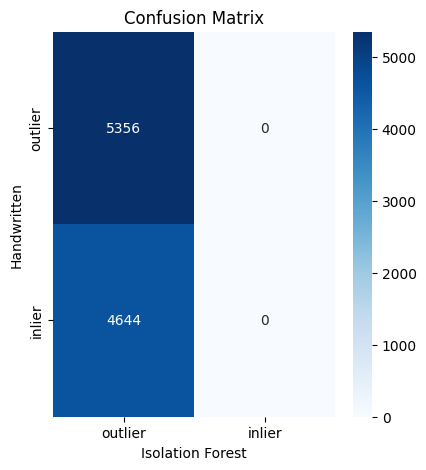

In [50]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [51]:
#Both agree it is inlier
all_inlier = df2[(df2['is_inlier_IF'] == 1) & (df2['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [52]:
#Both agree it is outlier
all_outlier = df2[(df2['is_inlier_IF'] == -1) & (df2['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")